# Import libraries

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read datasets of 'orders' and 'customers' and create two dataframes

In [102]:
hd_order = pd.read_csv('/Users/xufeishao/Desktop/Bootcamp/003 Python/project/Happy Deliveries/data/hd_orders.csv')

In [103]:
hd_customer = pd.read_excel('/Users/xufeishao/Desktop/Bootcamp/003 Python/project/Happy Deliveries/data/hd_customers.xlsx')

# Data preparation

## Step 1: A quick look into the data

In [104]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED


In [36]:
hd_customer.head()

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com


## Step 2: Check null values in both dataframes

In [37]:
hd_order.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      7
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          906
order_total              0
discount_pc            906
status                   0
dtype: int64

In [38]:
hd_customer.isnull().sum()

id            0
first_name    0
last_name     0
age           0
city          0
email         0
dtype: int64

## Step 3: Check whether hd_order and hd_customer have same number of unique customer IDs, to see whether there are customers in hd_order are non-loyalty card holders.

In [39]:
hd_order['cust_id'].nunique()

406

In [40]:
hd_customer['id'].nunique()

406

## Step 4: Check data types in both dataframes

In [41]:
hd_order.dtypes

order_id                 int64
order_timestamp         object
delivered_timestamp     object
driver_id                int64
restaurant_id            int64
cust_id                  int64
delivery_region         object
discount_applied          bool
discount_code           object
order_total            float64
discount_pc            float64
status                  object
dtype: object

In [42]:
hd_customer.dtypes

id             int64
first_name    object
last_name     object
age            int64
city          object
email         object
dtype: object

In [43]:
# since the value type of order_time and delivery time are object, change the datatype to datetime
hd_order['order_timestamp'] = pd.to_datetime(hd_order['order_timestamp'],dayfirst=True)

In [44]:
hd_order['delivered_timestamp'] = pd.to_datetime(hd_order['delivered_timestamp'],dayfirst=True)

In [45]:
# double check after converting the datatype
hd_order.dtypes

order_id                        int64
order_timestamp        datetime64[ns]
delivered_timestamp    datetime64[ns]
driver_id                       int64
restaurant_id                   int64
cust_id                         int64
delivery_region                object
discount_applied                 bool
discount_code                  object
order_total                   float64
discount_pc                   float64
status                         object
dtype: object

## Step 5: Extract month and year from order_time

In [46]:
hd_order['order_month'] = pd.to_datetime(hd_order['order_timestamp'],dayfirst=True).dt.month

In [47]:
hd_order['order_year'] = pd.to_datetime(hd_order['order_timestamp'],dayfirst=True).dt.year

In [48]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,11,2021
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED,7,2021
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED,4,2021
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED,2,2021
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED,6,2021


# Data analysis

## Report 1: Compare monthly 2021 sales to 2022 and determine has ‘Happy Deliveries’ sales grown. 

### Step 1: Find out sales per month in 2021 and 2022 (exclude 'cancelled' orders)

In [49]:
sales_2021 = hd_order[(hd_order['order_year']== 2021) & (hd_order['status']=='COMPLETED')] \
                         .groupby('order_month')['order_total']\
                         .sum().to_frame('amount').reset_index()

In [50]:
sales_2021

,order_month,amount
0,1,197.04
1,2,533.80
2,3,554.00
3,4,724.45
4,5,856.27
5,6,968.77
6,7,939.99
7,8,1204.13
8,9,516.01
9,10,731.66


In [51]:
sales_2022 = hd_order[(hd_order['order_year']== 2022) & (hd_order['status']=='COMPLETED')] \
                         .groupby('order_month')['order_total']\
                         .sum().to_frame('amount').reset_index()

In [52]:
sales_2022

,order_month,amount
0,1,358.43
1,2,748.36
2,3,1014.82
3,4,814.01
4,5,958.90
5,6,1443.54
6,7,1695.97
7,8,1423.04
8,9,408.44
9,10,607.93


### Step 2: Line plotting comparing sales by month in 2021 and 2022

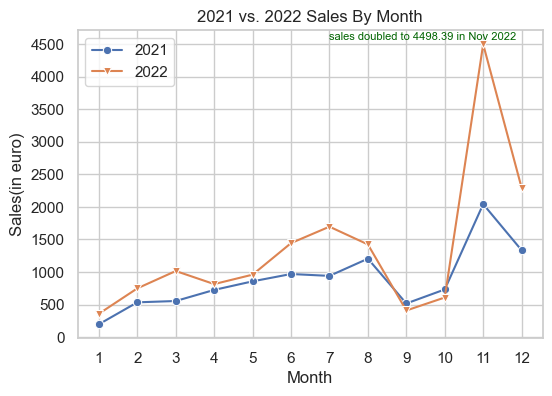

In [53]:
fig = plt.figure(figsize=(6,4))

sns.set(style="whitegrid")

ax = sns.lineplot(data = sales_2021, x='order_month', y='amount', label='2021',marker='o')
ax = sns.lineplot(data = sales_2022, x='order_month', y='amount', label='2022',marker='v')

ax.set_title('2021 vs. 2022 Sales By Month')
ax.set_xlabel('Month')
ax.set_xticks(range(1, 13, 1)) 
ax.set_ylabel('Sales(in euro)')
ax.set_yticks(range(0, 5000, 500)) 
ax.annotate('sales doubled to 4498.39 in Nov 2022',xy=(11,4498.39),xytext=(7,4560),fontsize=8,color='darkgreen')                             
plt.show()

## Report 2: What is the age distribution of loyalty card holders?

### Step 1: Check the data in hd_customer

In [54]:
hd_customer.sort_values(by = 'age', ascending=False)

,id,first_name,last_name,age,city,email
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
363,1364,Penny,Cummings,75,Galway,PCummings@zoho.com
8,1009,Sheri,Aguilar,71,Kerry,Aguilar.Sheri22@att.com
...,...,...,...,...,...,...
339,1340,Amanda,Miller,18,Limerick,Amanda.M@comcast.net
271,1272,Carolyn,Patterson,18,Limerick,Patterson.Carolyn@hotmail.com
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [55]:
# Detect age abnormalities
hd_customer['age'].describe()

count    406.000000
mean      29.354680
std       14.347274
min        6.000000
25%       22.000000
50%       26.000000
75%       31.000000
max      160.000000
Name: age, dtype: float64

In [56]:
# Create a new dataframe without age abnormalities
hd_customer_clean = hd_customer.loc[(hd_customer['age'] >= 18) & (hd_customer['age'] < 100) ]

In [57]:
hd_customer_clean.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


### Step 2: Plotting based on cleaned data

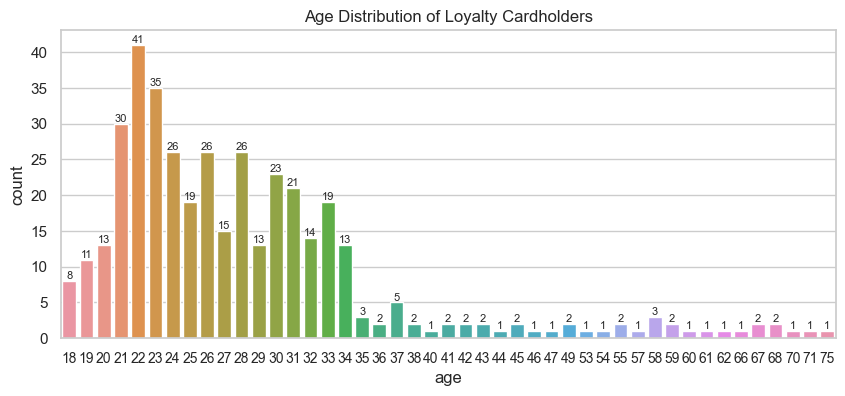

In [58]:
fig = plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
ax = sns.countplot(x='age',data=hd_customer_clean)
for i in ax.containers:
    ax.bar_label(i,fontsize=8)
plt.xticks(fontsize=10)
plt.title('Age Distribution of Loyalty Cardholders')
plt.show()

<Axes: >

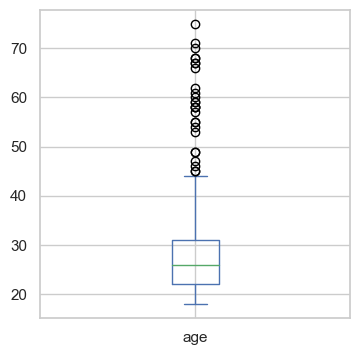

In [59]:
hd_customer_clean['age'].plot(kind='box',figsize =(4,4))

## Report 3: Is there relationship between the amount spend by a loyalty cardholder and their age?

### Step 1: Join cleaned customer dataframe with hd_order

In [60]:
ord_cust = hd_customer_clean.merge(hd_order,left_on='id',right_on='cust_id',how='left')

In [61]:
# Check the merged dataframe
ord_cust.shape

(979, 20)

In [62]:
ord_cust.head()

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,47,1002,Dublin,False,NaN,20.63,NaN,COMPLETED,1,2022
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100674,2022-08-17 17:55:00,2022-08-17 18:28:00,254,9,1002,Dublin,False,NaN,22.26,NaN,COMPLETED,8,2022
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100622,2022-07-14 21:45:00,2022-07-14 22:21:00,77,5,1003,Cork,False,NaN,28.24,NaN,COMPLETED,7,2022
3,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100652,2022-08-01 23:25:00,2022-08-01 23:58:00,314,107,1003,Dublin,False,NaN,9.92,NaN,COMPLETED,8,2022
4,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com,100857,2022-11-26 19:34:00,2022-11-26 20:08:00,177,274,1004,Galway,False,NaN,11.88,NaN,COMPLETED,11,2022


In [64]:
ord_cust['discount_pc'].isnull().sum()

889

In [65]:
# Fill the null value of discount_pc with 0
ord_cust['discount_pc'] = ord_cust['discount_pc'].fillna(0)

In [66]:
ord_cust['discount_pc'].isnull().sum()

0

### Step 2: Create a pivot column for 'status' as 'status_piv' , set completed = 1, cancelled = 0

In [67]:
ord_cust['status_piv'] = np.where(ord_cust['status']== 'COMPLETED', 1, 0)

### Step 3: Calculate actual spending considering 'discount_pc' and'status',when'cancelled' refund the payment,thus 'act_spend'== 0

In [68]:
ord_cust['act_spend'] = ord_cust['order_total'] * (1-(ord_cust['discount_pc']/100)) * ord_cust['status_piv']

In [69]:
ord_cust.head()

,id,first_name,last_name,age,city,email,order_id,order_timestamp,delivered_timestamp,driver_id,...,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year,status_piv,act_spend
0,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,...,Dublin,False,NaN,20.63,0.0,COMPLETED,1,2022,1,20.63
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com,100674,2022-08-17 17:55:00,2022-08-17 18:28:00,254,...,Dublin,False,NaN,22.26,0.0,COMPLETED,8,2022,1,22.26
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100622,2022-07-14 21:45:00,2022-07-14 22:21:00,77,...,Cork,False,NaN,28.24,0.0,COMPLETED,7,2022,1,28.24
3,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com,100652,2022-08-01 23:25:00,2022-08-01 23:58:00,314,...,Dublin,False,NaN,9.92,0.0,COMPLETED,8,2022,1,9.92
4,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com,100857,2022-11-26 19:34:00,2022-11-26 20:08:00,177,...,Galway,False,NaN,11.88,0.0,COMPLETED,11,2022,1,11.88


### Step 4: Generate a dataframe with customer id, age, discount_applied and total_spend / customer id

In [70]:
age_spend = ord_cust.groupby(['id','age','discount_applied'])['act_spend'].sum().to_frame('total_spend').reset_index()

In [71]:
age_spend.head(20)

,id,age,discount_applied,total_spend
0,1002,33,False,42.890
1,1003,23,False,38.160
2,1004,29,False,49.090
3,1005,22,False,66.980
4,1006,26,False,40.380
5,1007,58,False,55.610
6,1008,49,False,44.880
7,1009,71,False,149.000
8,1010,66,False,69.870
9,1011,67,False,47.490


### Step 5: Calucate correlation between age and spending per loyalty cardholder

In [72]:
age_spend_corr = age_spend[['age','total_spend']].corr(method = 'pearson')

In [73]:
age_spend_corr

,age,total_spend
age,1.000000,0.032843
total_spend,0.032843,1.000000


### Step 6: Scatter plot to find out correlation of age vs. spending per loyalty cardholder

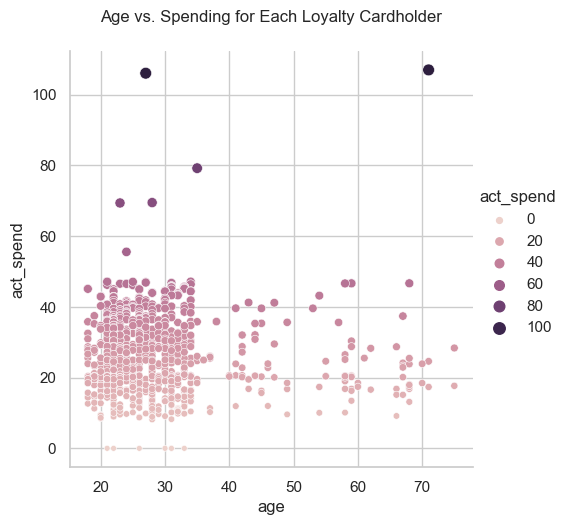

In [74]:
sns.relplot(x='age',y='act_spend',data=ord_cust,kind='scatter',size='act_spend',hue='act_spend')
plt.title('Age vs. Spending for Each Loyalty Cardholder',y=1.05)
plt.show()

## Report 4: Is there a relationship between the amount of a payment,the age of a person and whether or not they used discount codes

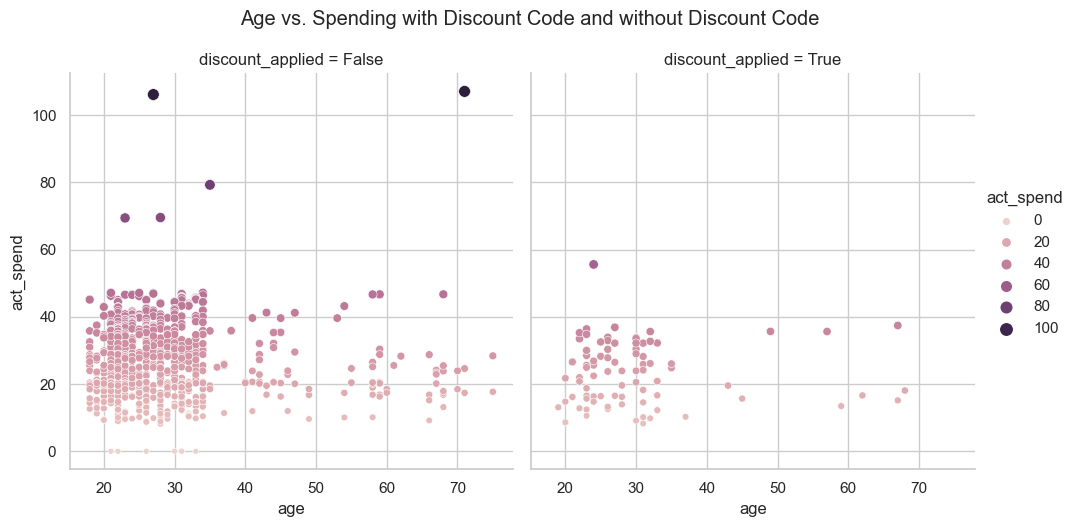

In [75]:
g = sns.relplot(x='age',y='act_spend',data=ord_cust,kind='scatter',size='act_spend',col='discount_applied',hue='act_spend')
g.fig.suptitle('Age vs. Spending with Discount Code and without Discount Code',y=1.05)
plt.show()

## Report 5: Compare the sales for 2022 across all regions

### Step 1: calculate sales per region in 2022

In [76]:
reg_sales_2022 = hd_order[hd_order['order_year']== 2022]\
                   .groupby('delivery_region')['order_total']\
                .sum().sort_values().to_frame('total_amount').reset_index()

In [77]:
reg_sales_2022.head(6)

,delivery_region,total_amount
0,Leitrim,493.89
1,Sligo,914.41
2,Kerry,1399.64
3,Galway,2752.46
4,Cork,3540.83
5,Dublin,7192.81


### Step 2: Bar plot sales per region in 2022

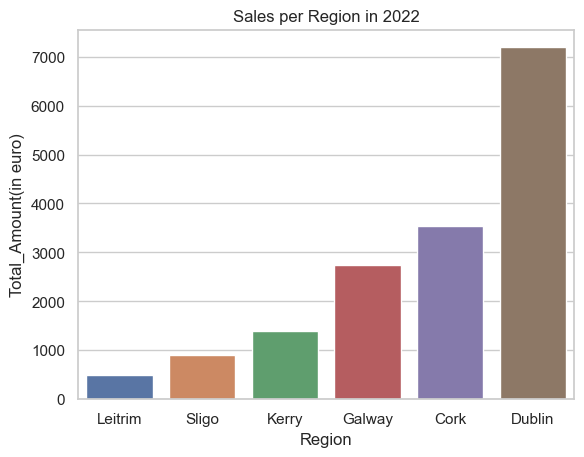

In [78]:
r = sns.barplot(x = 'delivery_region', y='total_amount',data=reg_sales_2022)
r.set(xlabel='Region', ylabel='Total_Amount(in euro)')
plt.title('Sales per Region in 2022')        
plt.show()

## Question 6: Find out top 10 highest spending customers in 2022 with their ID, name and email address

In [79]:
top_10_cust_2022 = ord_cust[ord_cust['order_year']== 2022]\
                                 .groupby(['id','first_name','last_name','email'])\
                                 ['act_spend'].sum().sort_values(ascending=False)\
                                  .nlargest(10).to_frame('total_spending').reset_index()

In [80]:
top_10_cust_2022

,id,first_name,last_name,email,total_spending
0,1027,Jason,Dudley,Jason_D@zoho.com,146.492
1,1126,Deanna,Knight,DeannaKnight@protonmail.com,146.300
2,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,131.640
3,1023,Gabrielle,Morgan,GMorgan48@mail.com,118.300
4,1021,Joshua,Kidd,Joshua_K@att.com,115.130
5,1018,David,Snyder,David.S@hotmail.com,105.220
6,1227,Andrew,Cantu,Andrew_Cantu@yandex.com,103.940
7,1028,David,Murphy,Murphy.David@mail.com,102.080
8,1059,Brent,Harrell,Harrell.Brent13@protonmail.com,99.380
9,1029,Meagan,Gonzalez,Gonzalez_Meagan43@mail.com,96.176


## Question 7: Find out the top 3 restaurants (ID) in terms of sales for 2022?

In [81]:
top_3_restaurant_2022 = hd_order[hd_order['order_year']== 2022]\
                       .groupby('restaurant_id')['order_total'].sum()\
                        .sort_values(ascending=False).nlargest(3).to_frame('sales_amount').reset_index()

In [82]:
top_3_restaurant_2022

,restaurant_id,sales_amount
0,9,742.06
1,107,645.50
2,8,564.36


## Question 8: Find all the customers who are considered non-returning(customer only one order) including their id, name and email in 2021.

### Step 1: Join hd_order and hd_customer tables (including all ages and orders made but then cancelled)

In [83]:
ord_cust_all = hd_customer.merge(hd_order,left_on='id',right_on='cust_id',how='inner')

In [84]:
ord_cust_all.columns

Index(['id', 'first_name', 'last_name', 'age', 'city', 'email', 'order_id',
       'order_timestamp', 'delivered_timestamp', 'driver_id', 'restaurant_id',
       'cust_id', 'delivery_region', 'discount_applied', 'discount_code',
       'order_total', 'discount_pc', 'status', 'order_month', 'order_year'],
      dtype='object')

### Step 2: Count orders in 2021 for each customer

In [85]:
order_count_2021= ord_cust_all[ord_cust_all['order_year']==2021]\
                          .groupby(['id','first_name','last_name','email'])['order_id'].count().to_frame('ord_count').reset_index()

In [86]:
order_count_2021

,id,first_name,last_name,email,ord_count
0,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,1
1,1010,John,Anderson,Anderson_John67@yandex.com,1
2,1011,Kevin,Blankenship,Kevin.B@gmail.com,1
3,1012,Lance,Lopez,LLopez@verizon.com,1
4,1013,Erik,Young,EYoung@gmail.com,3
...,...,...,...,...,...
290,1402,Sheila,Gibson,Gibson.Sheila@gmail.com,1
291,1403,Julie,Thomas,JThomas@mail.com,1
292,1404,Sarah,Juarez,SJuarez71@verizon.com,1
293,1405,Tony,Richardson,Richardson.Tony@yandex.com,1


### Step 3: Filter to a one_order dataframe with id, name and email

In [87]:
one_order_cust_2021 = order_count_2021[order_count_2021['ord_count']==1].reset_index()

In [88]:
one_order_cust_2021

,index,id,first_name,last_name,email,ord_count
0,0,1009,Sheri,Aguilar,Aguilar.Sheri22@att.com,1
1,1,1010,John,Anderson,Anderson_John67@yandex.com,1
2,2,1011,Kevin,Blankenship,Kevin.B@gmail.com,1
3,3,1012,Lance,Lopez,LLopez@verizon.com,1
4,5,1014,Kyle,Singh,Singh_Kyle@hotmail.com,1
...,...,...,...,...,...,...
218,290,1402,Sheila,Gibson,Gibson.Sheila@gmail.com,1
219,291,1403,Julie,Thomas,JThomas@mail.com,1
220,292,1404,Sarah,Juarez,SJuarez71@verizon.com,1
221,293,1405,Tony,Richardson,Richardson.Tony@yandex.com,1


In [89]:
one_order_cust_2021['id'].nunique()

223

## Question 9: Find out if the discount code ‘BLACKFRIDAY22’ was as successful as 2021 ‘BLACKFRIDAY21’ and total amount of sales from both discount codes.

In [90]:
hd_order.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,order_month,order_year
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,11,2021
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED,7,2021
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED,4,2021
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED,2,2021
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED,6,2021


### Step 1: Calculate sales amount from all discount codes

In [91]:
discode_sale = hd_order.groupby(['discount_code','order_year'])['order_total'].sum().to_frame('amount').reset_index()

In [92]:
discode_sale

,discount_code,order_year,amount
0,BLACKFRIDAY21,2021,734.53
1,BLACKFRIDAY22,2022,1211.22
2,HAPPYBIRTHDAY,2021,381.05
3,HAPPYBIRTHDAY,2022,224.61


### Step 2: Filter 'HAPPYBIRTHDAY' sales out

In [93]:
BF_21_22 = discode_sale[discode_sale['discount_code'] !='HAPPYBIRTHDAY']

In [94]:
BF_21_22

,discount_code,order_year,amount
0,BLACKFRIDAY21,2021,734.53
1,BLACKFRIDAY22,2022,1211.22


## Question 10: What were the locations with the lowest cumulative sales for 2022?  (Perhaps other factors are responsible for example low population)

In [96]:
lowsale_reg_2022 = hd_order[hd_order['order_year']==2022].groupby('delivery_region')['order_total'].sum().nsmallest(2).reset_index()

In [97]:
lowsale_reg_2022

,delivery_region,order_total
0,Leitrim,493.89
1,Sligo,914.41


# Conclusion

#### Report 1: Sales increased in each month of 2022 compared to 2021. In both years, there is a significant decline in September and a peak in November. Sales in November 2022 are more than twice as high as sales in November 2021.

#### Report 2: The 25% percentile to 75% percentile of loyalty cardholders are between the ages of 22 and 31, and the median age of loyalty cardholders is 26. The number of 22-year-old loyalty cardholders peaks at 41.

#### Report 3:  The Pearson correlation between the amount spent by loyalty cardholders and their age is '0.033' , which is considered as 'no correlation', The scatter plot also does not show a significant correlation.

#### Report 4: The scatter plot of loyalty cardholder using discount and not using discount vs their age doesn't show correlation between the their actual spending and their age.

#### Report 5: In 2022, the region with the highest sales is Dublin with €7,193 and Leitrim is the region with the lowest sales at €494.

#### Question 6: The top 10 spending customers id, name and email  in 2022 are: 
1027	Jason	Dudley	jason_D@zoho.com, 
1126	Deanna	Knight  DeannaKnight@protonmail.com, 	
1009	Sheri	Aguilar	Aguilar.Sheri22@att.com, 
1023	Gabrielle	Morgan	GMorgan48@mail.com, 
1021	Joshua	Kidd	Joshua_K@att.com, 	
1018	David	Snyder	David.S@hotmail.com, 	
1227	Andrew	Cantu	Andrew_Cantu@yandex.com, 	
1028	David	Murphy	Murphy.David@mail.com, 	
1059	Brent	Harrell	Harrell.Brent13@protonmail.com, 
1029	Meagan	Gonzalez  Gonzalez_Meagan43@mail.com	

#### Question 7: The top 3 restaurant IDs for sales in 2022 are: 9, 107, 8.

#### Question 8: There are 223 loyalty cardholders who have placed only one order in 2021.

#### Question 9: The sales of "BLACKFRIDAY22" are almost twice as high as those of "BLACKFRIDAY21", and the corresponding sales of the two discount codes is increased from 735€ to 1,211€.

#### Question 10: The 2 regions with the lowest sales in 2022 are Leitrim and Sligo. According to Wikipedia, these two regions have populations of 35,087 and 69,819 respectively, both of which are listed as the least populated regions in Ireland. Low sales may correspond to a low population. However, more evidence is needed to further investigate the causes of low sales.